In [1]:
## Please remember to update "COT.py" to the newest version

import sys
sys.path.append("C:/Users/cbil/Google Drive/SMG/Python/COT.py") # change to your own path

import pandas as pd
import GEOparse
import COT

In [2]:
## Download GSE28490

gse = GEOparse.get_GEO(geo="GSE28490", destdir='./', silent=True)

C:\ProgramData\Anaconda3\lib\site-packages\GEOparse\GEOparse.py:110: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  return parse_GSE(filepath, open_kwargs=open_kwargs)


In [3]:
## Select needed cell types

cellTypes = {"Neutrophils": [], "NK": [], "CD19+ B": [], "CD8+ T": [], "CD14+ monocytes": []}

sampleType = [] # cell type labels
for cell in cellTypes:
    for gsm in gse.phenotype_data.index.values:
        if cell in gse.phenotype_data["source_name_ch1"][gsm]:
            cellTypes[cell].append(gsm)
            sampleType.append(cell)
            
samples = [] # sample ID
for cell in cellTypes:
    samples = samples + cellTypes[cell]   
    
data = gse.pivot_samples('VALUE')[samples] # selected raw data

In [4]:
## Run COT

cot = COT.COT(df_raw=data, logarithmic_data=True)
cot.generate_subtype_means(sampleType)
cot.generate_cos_values()

COT: package initiated.
COT: subtype means generated.
COT: cos values generated.


In [5]:
## Estimate p-value

cot.estimate_p_values()

COT: estimating p-values.....
Iteration 1: 25.5959 seconds
Iteration 2: 17.7503 seconds
Iteration 3: 19.2441 seconds
Iteration 4: 19.1344 seconds
Iteration 5: 15.4612 seconds
Iteration 6: 15.4514 seconds
COT: p-values estimated.


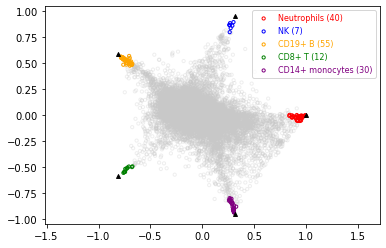

In [6]:
## Plot the markers on the simplex

cot.obtain_subtype_markers(top=144)
cot.plot_simplex()